## Preprocessing
Here, We discuss some of the most important techniques to preprocess the data that we get so that we can present it in a format that we would be able to work on.
One of the most important steps of devising any Machine Learning Algorithm is that the data that we train and test the algorithm on is in a proper format and here we are going to discuss some of those techniques and we should always remember that the data should be made in the best format possible because that would affect our model and that's why the most time a Data Scientist spends on is preprocessing their data

### 1.)Dropping the Missing Values
In this method we just directly remove the rows or columns which have missing values depending on some criterion as shown in the given ways.
This method even though very easy to implement but we can have very drastic results for out model training as we could remove huge amounts of training samples or important features just because they contain one of two missing values and hence this could lead to a less robust trained model.

In [2]:
## Importing the required libraries
import pandas as pd
from io import StringIO
import numpy as np

In [3]:
## making some random data
csv_data = \
            '''A,B,C,D
            1.0,2.0,3.0,4.0
            5.0,6.0,,8.0
            10.0,11.0,12.0'''
df = pd.read_csv(StringIO(csv_data))   ## Here StringIO is used to read in the data and it has many different attributes to use if you want to check them out

In [4]:
## Here we can check if any of the particular columns are empty and how many entries are not present
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
## Here we can directly drop those rows and columns that have NaN values 
print(df.dropna(axis = 0))
print(df.dropna(axis = 1))
print(df.dropna(how = 'all')) ## if we want to drop those rows which have all the columns NaN
print(df.dropna(thresh = 4)) ## Here we would drop those rows which have less then four real values
print(df.dropna(subset = ['C'])) ## Here we would drop only those rows in which NaN appers only in a particular subset of Columns

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


 ### 2.)Imputing Missing Values
 This method is comparatively more robust that dropping the values as here we assign some values to the missing cases depending upon the distribution of data for that particular feature and hence could attain a more robust model and also would not lose important features or lots of training samples
 
 Imputation is the method in which replace all the missing values depending upon the distribution of the data i.e. in particular that respective feature and we take the mean,median or any other measure of central tendency of the present values in the feature and hence replace the missing values with these and hence we remove the missing values

In [6]:
## Importing the Simple Imputer from sklearn package
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan,strategy = 'mean')   ## here using the mean of the data values in the column
imr = imr.fit(df.values)              ## fitting the values
imputed_data = imr.transform(df.values)      ## transforming the values
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Categorical Variables
These are the type of data that are present as the feature in the model but are not represented as numerical data types and one of the constraint's of using any model in pre-built packages is to provide all the features in numerical forms and hence we would need to process these types of data so that we could train our model efficiently.

Therefore, there are two types of Categorical variables which are nominal and ordinal and both represent categories but the main difference between these two types is the ordinal types also have a particular ordering with them while not in the case of nominal types.Hence we process our data in such a form so that we may be able to maintain these feature representation and hence our model could generalize to that.

In [7]:
## Here we build a normal dataset that which has both ordinal and nominal type of datas
df = pd.DataFrame([
            ['green','M',10.1,'class1'],
            ['red','L',13.5,'class2'],
            ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']

### Ordinal Values
Here we try to deal with the ordinal data values by assigning integer classes to different unique data values and still keeping the ordering important by giving the numeric order similar to ordinal order and then relpace these ordinal values with these numeric ones.
The main task in ordinal categories is to label each category manually and then replace them in the feature column

In [8]:
## Manually allocating numeric values
size_mapping = {
                'XL' : 3,
                'L' : 2,
                'M' : 1}
df['size'] = df['size'].map(size_mapping)    ## Mapping these values
## here we define the class labels for the different classes that we would want to predict
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)    ## Mapping these values

### Nominal Values
Here we move to nominal values and hence can easily convert values when they take up only two unique labels by assigning binary codes but when it comes to more than two we suffer because we could end up making new feature importance which might never be present beacuse of the ordering of the unique integers and hence the model might end up learning that feature that was never present their and hence give wrong results and therefore we tend to use onehot encoded values for nominal data types when they have more that two unique labels.

In [9]:
## We can also use the in-built sklearn function for encoding these values
df = pd.DataFrame([
            ['green','M',10.1,'class1'],
            ['red','L',13.5,'class2'],
            ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
size_mapping = {
                'XL' : 3,
                'L' : 2,
                'M' : 1}
df['size'] = df['size'].map(size_mapping)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)   ## Here we use the fit_transform method to directly transform these values
print(y) ## Hence the values are then changed to numerical
print(class_le.inverse_transform(y))     ## This is the inverse to change back to the original values

[0 1 0]
['class1' 'class2' 'class1']


In [10]:
## Here we try to use numeric values for the Color Column but end up having an order between three different colors which is never present their
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [11]:
## using the onehot labels 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = df.iloc[:,0].values.reshape((-1,1))
ohe.fit_transform(X).toarray() ## hence we obtain the respective labels for the uniqie nominal values

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
## We can also use the get_dummies method of pandas to transform a data frame automatically
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [13]:
## We can also drop the first column of these new features columns and it wouldn't still affect the learnign because it coult consider the case of all whole column zero as the third case 
## Hence we only to add n - 1 columns for nominal data types if we would have n unique labels in that feature column
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


### Train Test Split
This is also one of the most important steps of training a model such that we might be able to access out models generalization power by splitting our dataset into training and testing data and hence train our model on the training data and test in on the testing data.

During splitting the dataset we need to make sure that the distribution of the dataset in both the dataset is similar our we might end up having a model trained on the training data and not generalize on the test data

In [14]:
## Here we use the famous wine dataset 
df_wine = pd.read_csv('wine.data',header = None)
df_wine.columns = ['Class label','Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

## Now we use the train_test_split method to split the dataset into two distinct datasets
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,stratify = y) ## Here we provide stratify as 'y' such that it ensures that both the train and test dataset have similar proportion of class labels and hence similar distributions

### Feature Scaling
Feature Scaling is also an important step of preprocessing the dataset as it ensures that all the features are on the similar scale and hence the training of the weights would not be affected by these scaled features as the weights might end up being very large and very small according to the feature values.

Having scaled features ensures that the weight updates are also on similar scale and hence we would be able to train our model faster as it would mode towards the global minimum more efficiently.

#### Scaling Methods
We can perform two types of scaling methods which are as follows:-

**Normalization**

**Standardization**

In [15]:
## here we normalize the features on between the min and max of the respective features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
## Here we show the two different methods of normalization and standardization
ex = np.array([0,1,2,3,4,5])
print('Standardized: ',(ex-ex.mean())/ex.std())
print('\nNormalized: ',(ex-ex.min())/(ex.max()-ex.min()))

Standardized:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]

Normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


In [16]:
## Here we show how to standardize the festures
## Sometimes we generally tend to use the Standarization more that Normalization because it tends to preform better
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Regularization Methods as feature selectors
Here we stop to understand the different regularization methods for the models which effects our models in different ways:

**L2 Regulariztion**:
This is also referred to as Ridge Regression and the main idea of adding this type of regularization parameters is for the better generalization of our model which it does by decreasing the overfitting of the model on the dataset by decrementing the effect of weights by decreasing their values and hence would then need to be more robust such that it could still perform good on the training data but not overfit and hence would generalize and due to this we could check the weights of some features and understand that they are very low comparing to other hinting that these are not that importan.

**L1 Regularization**:
This is also referred LASSO Regularization and here we would be able to generalize much better in the effects of feature selection as in this case we would get the weights of non relevant features directly zero because of the mode term and hence we could easily infer which features are important for model training. One downside to this method is that it is not differentiable in the whole feature space.

In [17]:
## Here we have seen in action the effect of regularization and hence have some weights very near to zero
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2',C=1.0)    ## With the help of C which the inverse of regulariztion parameter lambda we could easily vary the effect of regularization
lr.fit(X_train_std,y_train)
print('Training accuracy: ',lr.score(X_train_std,y_train))
print('Test accuracy :',lr.score(X_test_std,y_test))
print(lr.intercept_)
print(lr.coef_)

Training accuracy:  1.0
Test accuracy : 1.0
[ 0.36864899  0.78042576 -1.14907476]
[[ 0.78792017  0.24090991  0.44731358 -0.73488507  0.11131899  0.22607309
   0.60649143 -0.14846826  0.2412906   0.14146002  0.1067172   0.58063797
   0.98241228]
 [-0.95394452 -0.43669598 -0.7679318   0.50645904 -0.17622726  0.07109671
   0.38810168  0.09342089  0.11351155 -0.91231504  0.61090074  0.16781098
  -1.09996903]
 [ 0.16602435  0.19578606  0.32061822  0.22842603  0.06490827 -0.2971698
  -0.99459311  0.05504737 -0.35480216  0.77085502 -0.71761794 -0.74844895
   0.11755675]]


#### Effect of different regularization parameters
Here we see the effect of different regularization parameters on the different feature weights and how they effect the model training.

We can easily see that for high regularization the weights are zero and low regularization the weights are high and could overfit

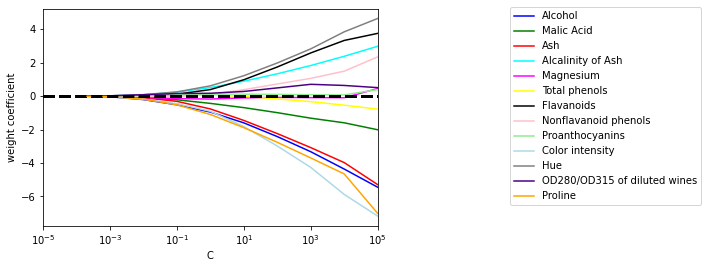

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights , params =[] , []
for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty = 'l2',C = 10.**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column , color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label = df_wine.columns[column+1],color = color)
    plt.axhline(0,color = 'black',linestyle = '--',linewidth = 3)
    plt.xlim([10**(-5),10**5])
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.xscale('log')
    plt.legend(loc = 'upper left')
    ax.legend(loc = 'upper left',bbox_to_anchor = (1.38,1.03),ncol = 1,fancybox = True)
plt.show()

### Dimensionality Reduction
One of the biggest problems in model training is the amount of dimension's present in the dataset which we define as the **Curse of Dimensionality**.The problem arises that we would have huge amount of features which increases the feature space size exponentially and hence we wouldn't be able to form any type of pattern in the dataset.

Therefore to tackle this problem we tend to reduce the dimensions i.e. the feature set of the dataset using different methods of which we are discussing one which is **Feature Selection**.

In this method we select a subset of features that we would need to define the dataset as much as possible by selecting the features which are most relevant to the problem,hence increasing the computational efficiency or reduce the generalization error.One of the algorithms for this method is **Sequential Backward Selection**.This aims to reduce the dimensionality with a minimum decay in performance of the classifier by selecting the most relevant features in a **Greedy** manner.It also tends to increase the predictive power in case the model overfits.

In [19]:
## We have defined as SBS Class in the Feature_Selection module to select the relevant features from the dataset
from sklearn.neighbors import KNeighborsClassifier
from Feature_Selection import SBS
knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn,k_features = 1)    ## here we fit the sbs method to perform the featuer selection on the wine dataset using the knn model until we get the best one feature 
sbs.fit(X_train_std,y_train)

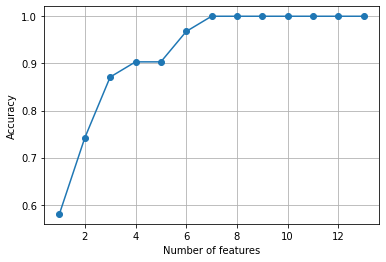

In [20]:
## Now we visualize the scores of the model with the selected number of features list
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker = 'o')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [21]:
## Hence we can see that the model with three features performs very well on the dataset and now we use these features to train and test our model's accuracy
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])   ## Which three features are those
knn.fit(X_train_std,y_train)     ## model when we fit the whole features and their respective accuracies
print('Training accuracy: ',knn.score(X_train_std,y_train))
print('Test accuracy: ',knn.score(X_test_std,y_test))
knn.fit(X_train_std[:,k3],y_train)     ## model when we fit only the three required features and their respective accuracies
print('Training accuracy: ',knn.score(X_train_std[:,k3],y_train))
print('Test accuracy ',knn.score(X_test_std[:,k3],y_test))

Index(['Alcohol', 'Ash', 'Nonflavanoid phenols'], dtype='object')
Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629
Training accuracy:  0.8870967741935484
Test accuracy  0.8148148148148148


### Feature Extraction 
Previously we had discussed about the one of the dimensionality reduction techniques that being **Feature Selection** and now we are going to discuss the Second technique which is called the **Feature Extraction**.In this method we don't typically select the subset of the features to reduce dimensions but here we define a new subspace which is made of the dimensions lesser than the original space but this space holds the dimensions which defines our dataset the most i.e. it holds the those dimensions where the dataset has high variance.Here we typically project or transform the data onto on a new feature which defines the data the most.

There are typically three methods which we are going to discuss, those being:

**1.) Principal Component Analysis**

**2.) Linear Discrimant Analysis**

**3.) Kernel Principal Component Analysis**

## PCA
PCA or Principal component Analysis is one of the most important methods used for feature extraction.It is used as an unsupervised data compression technique i.e. we don't need to know the labels of dataset but can understand the pattern of variance from the unlabeled dataset based on the correlation between features.It aims to find the directions of maximum variance in high-dimensional data and projects it into a new subspace with equal or fewer dimensions.We find the principal components of new subspace which is interpreted as the direction of maximum variance.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('wine.data',header = None)

### Standardizing the data
Here we standardize the data like shown preciously as PCA is highly sensitive to data scaling and it would be best to scale the data so that we achieve rationale principal components

In [23]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =0,stratify =y)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Covariance Matrix
Here we develop the Covariance Matrix for the dataset which represents the pairwise covariances between the different features and which could represent the relationship's between different features such as, a positive covariance between two features indicates that the features increase or decrease together whereas a negative covariance indicate that the features vary in opposite directions.

The eigen vectors of the covariance matrix represent the principal components and the corresponding eigen values represent their magnitude and hence we can obtain the eigen pairs from the respective covariance matrix.


 Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


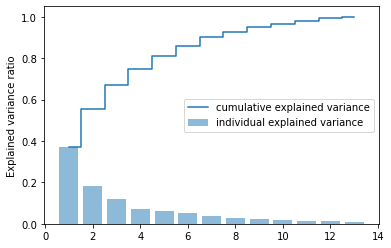

In [24]:
## here we use the respective numpy functions to find out the covariance matrix and respective eigen pairs
cov_mat = np.cov(X_train_std.T)
eigen_vals , eigen_vecs = np.linalg.eig(cov_mat)
print('\n Eigenvalues \n%s' % eigen_vals)

## Here we plot the graph which shows how much each feature holds the variance of the dataset and hence it's importance is high if it's explained variance is high
tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals,reverse = True)] ## defining the explained variance and sorting it in decreasing order
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14),var_exp,alpha = 0.5,align = 'center',label = 'individual explained variance')
plt.step(range(1,14),cum_var_exp,where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.legend(loc = 'best')
plt.show()
## hence we can that the initial two principal components hold almost 60% of the variance

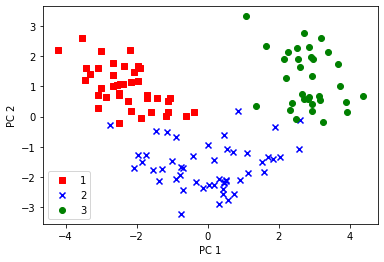

In [25]:
## Here we transform our input data to the new space so that we can use for training the model
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k :k[0],reverse = True)

w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))        ## here we use the first two principal components into which we would transform our dataset

X_train_pca = X_train_std.dot(w)    ## Transforming the dataset
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):   ## hence we plot the dataset in the two dimensional space to visualize it
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c = c,label = l,marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()



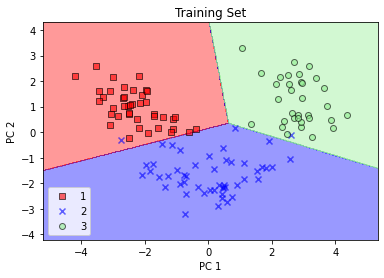

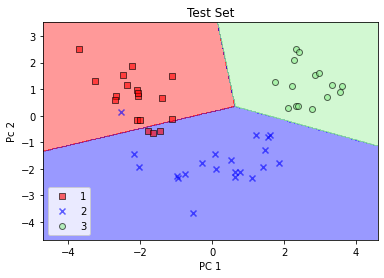

In [26]:
## Here we use the PCA method buit into the sklearn library 
from DecisionBoundary import plot_decision_boundary
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)      ##here similarly use the first two principal components
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)  ## transforming both the training set and test set
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_boundary(X_train_pca,y_train,classifier = lr)   ## plotting for the training set
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.title('Training Set')
plt.show()

## plotting for the test set
plot_decision_boundary(X_test_pca,y_test,classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('Pc 2')
plt.legend(loc = 'lower left')
plt.title('Test Set')
plt.show()

## LDA
LDA or Linear Discriminant Analysis is similar to PCA very much but differs on the grounds that PCA aims to find the orthogonal component of maximum variance while LDA finds the feature subspace that optimizes class separability.LDA is used as an supervised technique i.e. we need the class labels to use LDA.One assumption of LDA is that it asssumes that the data is distributed normally.

The main idea behind LDA is that it tries to find the direction axes which separates the class labels in the feature space as far as possible and hence would select these direction axes to tranform the given training and test data.Initially we use the class labels to find out the mean feature vector for each class and hence we use these to evaluate the within-class Scatter matrix and between-class scatter matrix and then evaluate the respective eigen pairs from the Covariance Matrix of there calculation of the matrix and hence then we evaluate the decreasing order of eigen values and using that we use the eigen vectors 

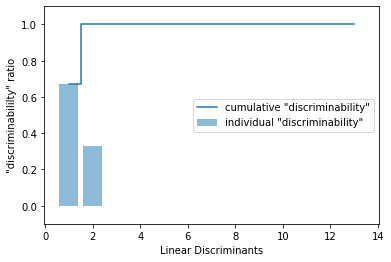

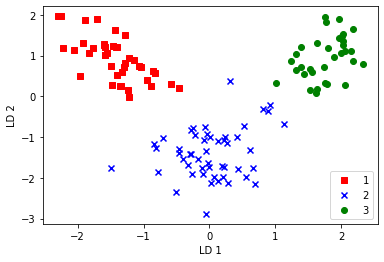

In [27]:
## stroing the mean vectors
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis = 0))

d = 13       ## number of initial dimensions
S_W = np.zeros((d,d))         ## initializing the within class scatter matrix and hence evaluating it
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)       ## by using this we can also scale the data which is required as the distribution's of labels is not uniform
    S_W += class_scatter

mean_overall = np.mean(X_train_std,axis = 0)       ## Overall mean required for Between Class Scatter Matrix
d = 13
S_B = np.zeros((d,d))
for i ,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)   

## now we just have to evaluate the SVD of the matrix inv(S_w).dot(S_B)
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key = lambda k : k[0],reverse = True)
## Here we plot those components explained variances to check their relevance
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real,reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14),discr,alpha = 0.5,align = 'center',label = 'individual "discriminability"')
plt.step(range(1,14),cum_discr,where = 'mid',label = 'cumulative "discriminability"')
plt.ylabel('"discriminabililty" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc = 'best')
plt.show()
## Now we just use the first two LDA components to define the new feature space of the dataset
W = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
               eigen_pairs[1][1][:,np.newaxis].real))
## Transforming the data
X_train_lda = X_train_std.dot(W)
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],
                X_train_lda[y_train==l,1]*(-1),
                c = c,label = l,marker = m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.show()
## Here we can see that the new feature space defining the dataset is easily separable

### LDA with scikit-learn
Here we implement the same LDA technique that we implemented before by using the built in method in scikit learn

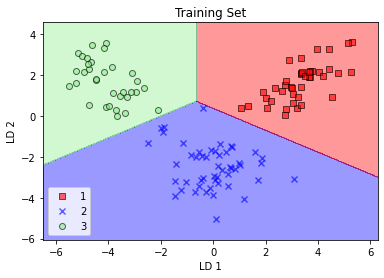

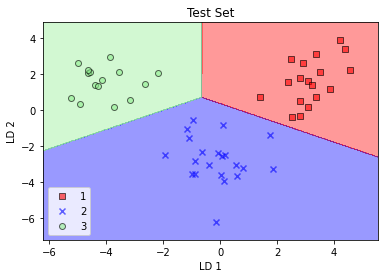

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
lr = LogisticRegression()
lr = lr.fit(X_train_lda,y_train)
plot_decision_boundary(X_train_lda,y_train,classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'best')
plt.title("Training Set")
plt.show()

X_test_lda = lda.transform(X_test_std)
plot_decision_boundary(X_test_lda,y_test,classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title("Test Set")
plt.legend(loc = 'best')
plt.show()
## Hence we can see that using this method also we can extract the required features so that we can classify our data

## KPCA
KPCA or Kernel Principal Component Analysis is a different method as compared to PCA or LDA as it mainly focuses to datasets which are not linearly separable in high dimensions so that we transform them into new subspaces such that they are linearly separable.The main idea behind this technique is that we use a non linear mapping to transform the data onto a higher dimensional space and hence we use a standard PCA in this higher dimensional space to project the data bak onto a lower dimensional space where the samples can be separated by a linear classifier.Here the trick that we use for better computational complexity is that we use the kernel trick to evaluate the measure of similarity from high to lower dimension and using this we can calculate the dataset by getting the transformed dataset and not the transformation matrix from the kernel trick.

We can use different types of kernel for evaluation such as **Radial Basis Kernel(Gaussian Kernel), Hyperbolic tangent Kernel and Polynomial kernel** to name a few.

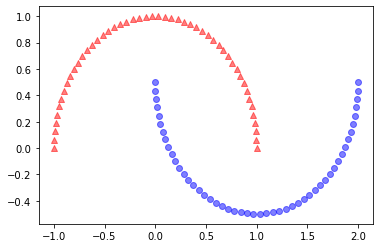

In [29]:
## Here we use the make moons dataset to show the KPCA working 
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100,random_state = 123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker = '^',alpha = 0.5)
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
plt.show()
## As we can see that the dataset is not linearly separable

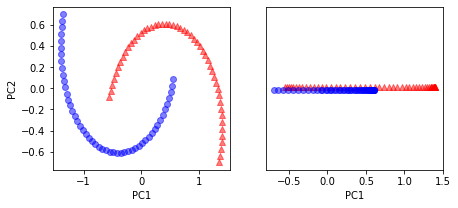

In [32]:
##Lets first try too implement the standard PCA Algorithm to see that if we could separate the dataset
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig ,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color = 'red',marker = '^',alpha = 0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,color = 'red',marker = '^',alpha = 0.5)
ax[1].scatter(X_spca[y==0,1],np.zeros((50,1))-0.02,color = 'blue',marker = 'o',alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## Hence we can that transformed dataset into new dimensions also isn't linearly separaable 

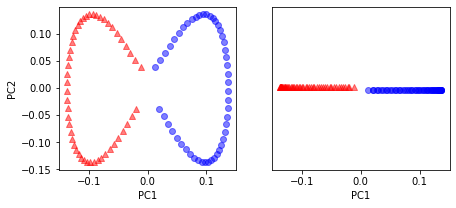

In [34]:
## Now we implement the KPCA Algorithm using Gaussion Kernel
from KPCA import rbf_kernel_pca
X_kpca,_ = rbf_kernel_pca(X,gamma = 15,n_components = 2)
fig , ax = plt.subplots(nrows = 1,ncols = 2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color = 'red',marker = '^',alpha =0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color = 'red',marker = '^',alpha = 0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color = 'blue',marker = 'o',alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## Hence we can see that now the dataset is easily linearly separable 

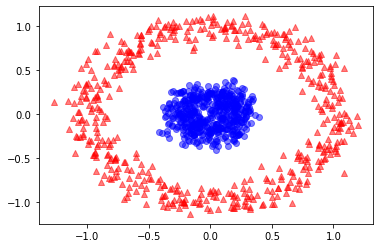

In [35]:
## Here we will see another example of KPCA over PCA
from sklearn.datasets import make_circles
X,y = make_circles(n_samples= 1000,random_state = 123,noise = 0.1,factor = 0.2)
plt.scatter(X[y==0,0],X[y==0,1],color = 'red',marker = '^',alpha = 0.5)
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
plt.show()
## The data is clearly not linearly separable

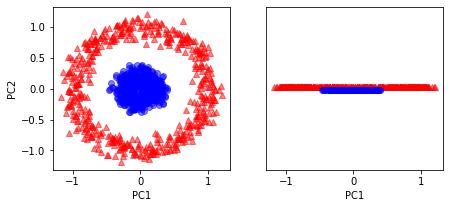

In [36]:
## Here we use the standard PCA for reducing the dimensions
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig , ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color = 'red',marker = '^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,color = 'red',marker = '^',alpha = 0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,color = 'blue',marker = 'o',alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## Hence we can still see that the data is not linearly separable

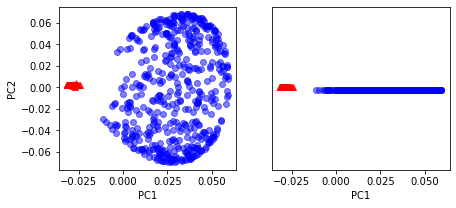

In [38]:
## Now we implement the KPCA Algorithm to separate the dataset
X_kpca,_ = rbf_kernel_pca(X,gamma = 15,n_components = 2)
fig ,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color = 'red',marker = '^',alpha = 0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02,color = 'red',marker = '^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))-0.02,color = 'blue',marker = 'o',alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## Hence we can see that now the dataset is linearly separable

#### Projecting new datapoints 
One problem occurs with KPCA is that since we don't get any transformation matrix like Standard PCA but we get the data points already transformed into the new subspace which gives us a new problem that how will we project any new data point that comes for us to classify, hence here we tackle that problem.

The main idea behind projecting the new data point is that we need to use the whole dataset of training data again such that we can evaluate the similarity between these new data points and the training points and hence we could classify these new data points respectively.

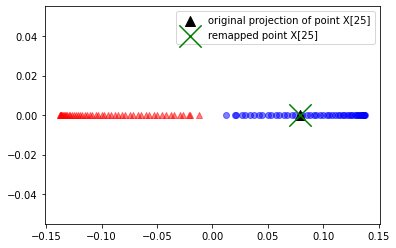

In [41]:
X,y = make_moons(n_samples = 100,random_state = 123)
alphas , lambdas = rbf_kernel_pca(X,gamma = 15,n_components=1)   ## The implementation having the respective transformed dataset
## checking if our tranformation works
x_new = X[25]        ## Taking any particular element
x_proj = alphas[25]  ## checking its projected value

def project_x(x_new,X,gamma,alphas,lambdas):                   ## using this method we would be able to project any new data point as well
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

x_reproj = project_x(x_new,X,gamma = 15,alphas = alphas,lambdas=lambdas)  ## this is the reprojected point

plt.scatter(alphas[y==0,0],np.zeros((50)),color='red',marker = '^',alpha = 0.5)
plt.scatter(alphas[y==1,0],np.zeros((50)),color = 'blue',marker = 'o',alpha = 0.5)
plt.scatter(x_proj,0,color = 'black',label = 'original projection of point X[25]',marker = '^',s=100)
plt.scatter(x_reproj,0,color = 'green',label='remapped point X[25]',marker = 'x',s = 500)
plt.legend(scatterpoints=1)
plt.show()
## hence we can see that our implementation works and we got the required reprojected point again

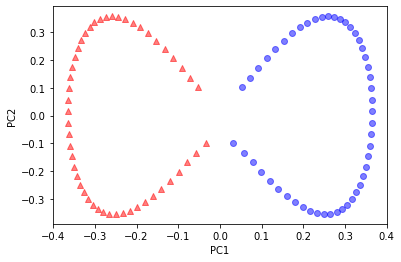

In [43]:
## Lastly we can implement the KPCA algorithm from scikit learn package
from sklearn.decomposition import KernelPCA
X,y = make_moons(n_samples = 100,random_state = 123)
scikit_pca = KernelPCA(n_components = 2,kernel = 'rbf',gamma = 15)
X_skernpca = scikit_pca.fit_transform(X)
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color = 'red',marker='^',alpha = 0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color = 'blue',marker = 'o',alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
## Hence we can see the effectiveness of the KPCA Algorithm